In [60]:
import cv2

In [61]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Genuine signatures (flattened list)
gen_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*')
    ] for file in dataset
]

# Forged signatures (flattened list)
forg_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')
    ] for file in dataset
]



In [63]:
# Check how many genuine and forged signatures were loaded
print(f"Number of genuine signatures loaded: {len(gen_sign)}")
print(f"Number of forged signatures loaded: {len(forg_sign)}")

# Optionally, print some sample file paths to verify
if gen_sign:
    print(f"Sample genuine signature: {gen_sign[0]}")
if forg_sign:
    print(f"Sample forged signature: {forg_sign[0]}")


Number of genuine signatures loaded: 361
Number of forged signatures loaded: 360
Sample genuine signature: Dataset_Signature_Final/Dataset/dataset1/real\00100001.png
Sample forged signature: Dataset_Signature_Final/Dataset/dataset1/forge\02100001.png


In [64]:
import cv2

def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images


In [70]:
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

In [71]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


In [77]:
gen_imgs[0].shape

(88, 191, 3)

In [73]:
num_gen=sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures :{ num_gen}')
print(f'Number of forged signatures :{ num_forg}')

Number of real signatures :361
Number of forged signatures :360


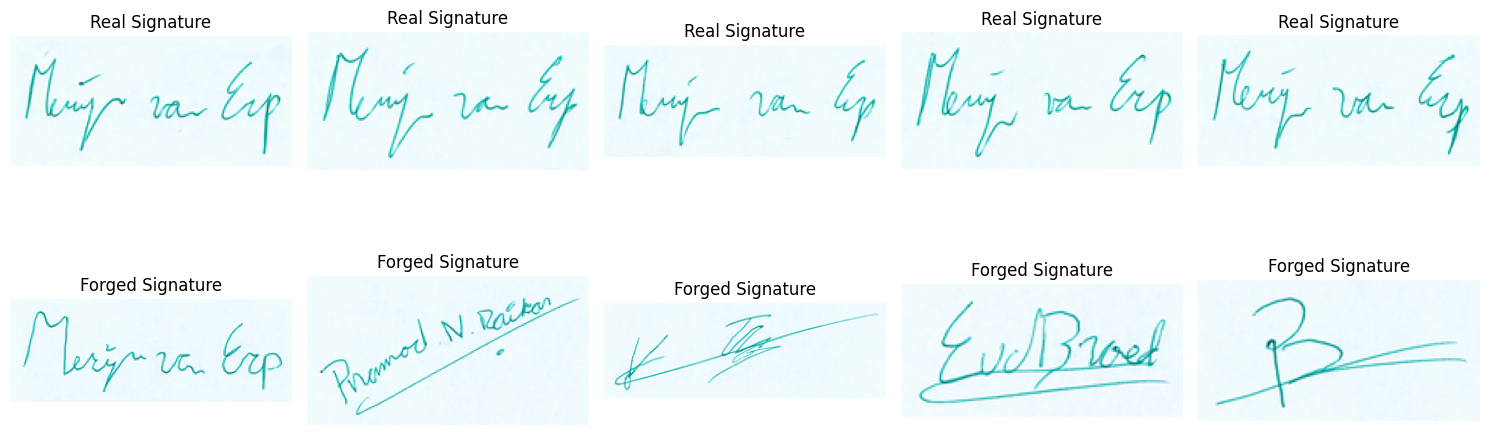

In [75]:
import matplotlib.pyplot as plt
import cv2

# Assuming gen_imgs and forg_imgs are already loaded and contain images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

# Display genuine signatures
for i in range(min(5, len(gen_imgs))):  # Use min to avoid IndexError
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature')
    ax[0, i].axis('off')  # Turn off axes

# Display forged signatures
for i in range(min(5, len(forg_imgs))):  # Use min to avoid IndexError
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature')
    ax[1, i].axis('off')  # Turn off axes

plt.tight_layout()  # Adjust layout
plt.show()


In [78]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])
                                 

In [79]:
#add real signature data to the dataframe
data_list=[]
for i in range(len(gen_shape)):
    data_list.append({'Type':'Real',
                      'Shape':gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value':gen_pixels[i]})

In [85]:
import pandas as pd

# Assuming gen_shape, gen_color, and gen_pixels are already calculated lists

# Initialize the DataFrame with the structure
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

# Collect data for real and forged signatures
data_list = []

# Append data for genuine signatures
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

# Append data for forged signatures
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

# Convert the list of dictionaries to a DataFrame
image_data = pd.DataFrame(data_list)

# Output to check
print(image_data)



       Type           Shape  Color Channels  Mean Pixel Value
0      Real    (88, 191, 3)               3        242.764537
1      Real    (90, 184, 3)               3        243.156039
2      Real    (80, 202, 3)               3        243.308932
3      Real    (90, 186, 3)               3        243.039865
4      Real    (90, 194, 3)               3        242.720103
..      ...             ...             ...               ...
715  Forged  (382, 1010, 3)               3        240.179306
716  Forged  (532, 1552, 3)               3        243.524036
717  Forged  (386, 1023, 3)               3        240.151832
718  Forged  (571, 1402, 3)               3        243.676428
719  Forged   (336, 965, 3)               3        238.301999

[720 rows x 4 columns]


In [86]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [87]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel Value
715,Forged,"(382, 1010, 3)",3,240.179306
716,Forged,"(532, 1552, 3)",3,243.524036
717,Forged,"(386, 1023, 3)",3,240.151832
718,Forged,"(571, 1402, 3)",3,243.676428
719,Forged,"(336, 965, 3)",3,238.301999


In [88]:
image_data.shape

(720, 4)

In [89]:
#display summary statistics of image data
print(image_data.describe())

       Color Channels  Mean Pixel Value
count           720.0        720.000000
mean              3.0        243.039370
std               0.0          5.213333
min               3.0        226.423019
25%               3.0        239.804540
50%               3.0        242.563931
75%               3.0        247.552634
max               3.0        252.423212


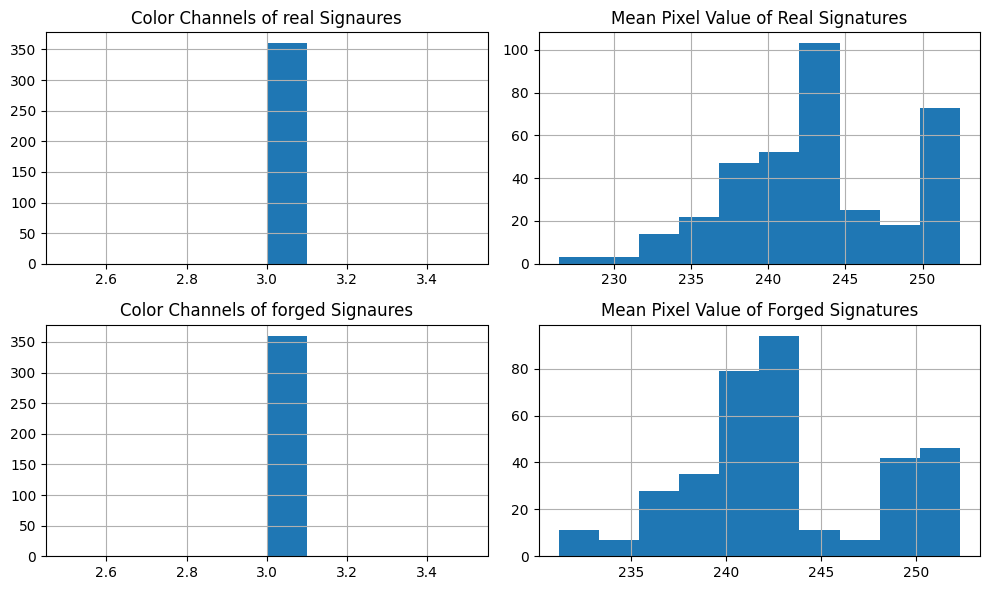

In [90]:
#create histograms to visualize the distribution of image data
fig,ax=plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of real Signaures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of forged Signaures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()




In [92]:
#RNN
import tensorflow
from tensorflow import keras
from keras import layers

In [93]:
#load the data
(train_data,train_labels),(test_data,test_labels)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [94]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)